<a href="https://colab.research.google.com/github/janeaf/Titanic/blob/main/4_2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

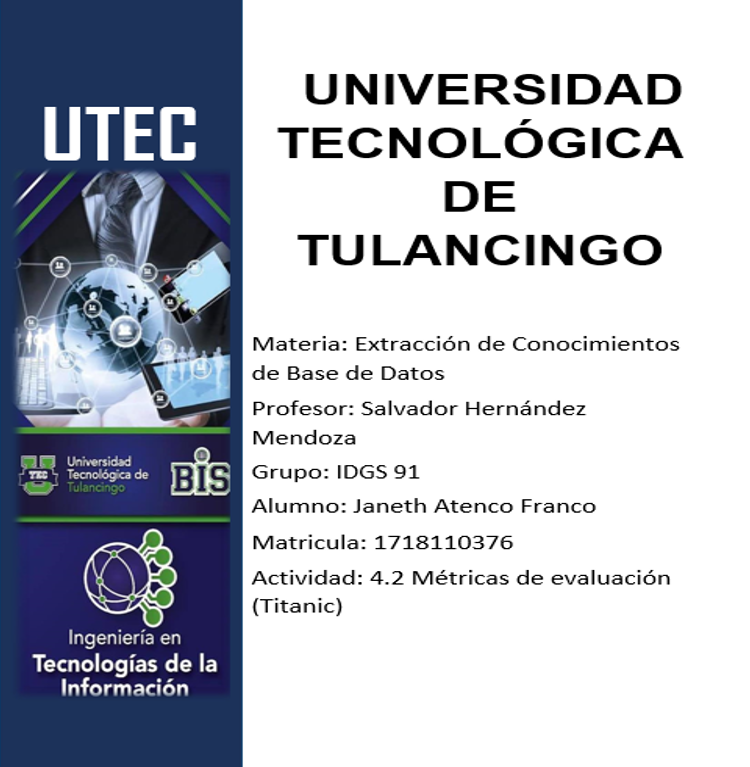

# **Titanic**

# **Importar Librerias**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pd.options.display.max_columns = 10

# **Cargar el Dataset**

In [ ]:
df = pd.read_csv("titanic.csv",delimiter=',',header='infer')

In [ ]:
#Muestra la forma del dataframe
df.shape

(887, 7)

In [ ]:
#Primeros los registros
df.head(3)

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [ ]:
#Ultimos registros
df.tail(3)

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
884,0,3,female,7.0,1,2,23.45
885,1,1,male,26.0,0,0,30.00
886,0,3,male,32.0,0,0,7.75


In [ ]:
#Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


# **Limpiar datos**

In [ ]:
#Suma de los datos faltantes
df.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
Siblings/Spouses    0
Parents/Children    0
Fare                0
dtype: int64

# **Feature ingenering (Crear Columna)**

In [ ]:
df['Male'] = df['Sex'] == 'male'

In [ ]:
# Muestra el dataframe modificado
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [ ]:
#Sumar el total de datos 
df['Male'].sum()

573

# **Graficas**

Text(0, 0.5, 'Age')

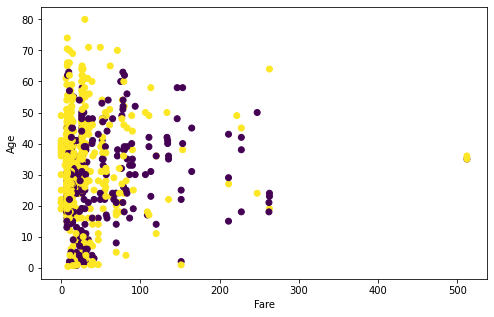

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Male'], marker='o')
plt.xlabel('Fare')
plt.ylabel('Age')

# **Separar caracteristicas y objetivo**

In [ ]:
X = df[['Pclass', 'Age', 'Siblings/Spouses',	'Parents/Children',	'Fare',	'Male']].values
Y = df['Survived'].values
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [ ]:
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

# **Configurar Modelo**

In [ ]:
model = LogisticRegression()

# **Dividir Train y Test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1234)

# **Entrenamiento del Modelo**

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

# **Predicciones**

In [ ]:
y_pred = model.predict(X_test)

# **Analisis de predicciones**

In [ ]:
X_test.shape

(178, 6)

In [ ]:
#Muestra todos los registros
X_test[0:8]

array([[3, 19.0, 0, 0, 7.8958, True],
       [3, 22.0, 0, 0, 7.8958, True],
       [1, 47.0, 1, 1, 52.5542, False],
       [2, 29.0, 0, 0, 10.5, True],
       [3, 18.0, 0, 0, 7.7958, True],
       [3, 39.0, 0, 0, 7.925, True],
       [3, 14.0, 5, 2, 46.9, True],
       [2, 24.0, 1, 2, 65.0, False]], dtype=object)

In [ ]:
#Datos esperados
Y_test[7:19]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
#Datos obtenidos
y_pred[7:19]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

Solo dos valores son los que no coinciden.

# **Probabilidad de predicción**

In [ ]:
#Probabilidad "no sobrevivio"
model.predict_proba(X_test)[7:19,0]

array([0.18144388, 0.94066414, 0.07951965, 0.89632751, 0.91037562,
       0.29282373, 0.72591669, 0.48655704, 0.87166001, 0.13670495,
       0.71597703, 0.93827604])

In [ ]:
#Probabilidad "sobrevivio"
model.predict_proba(X_test)[7:19,1]

array([0.81855612, 0.05933586, 0.92048035, 0.10367249, 0.08962438,
       0.70717627, 0.27408331, 0.51344296, 0.12833999, 0.86329505,
       0.28402297, 0.06172396])

In [ ]:
#Numero total de personas
personas = Y.shape

In [ ]:
#Numero total de sobrevivientes
sobrevivientes = Y.sum()

In [ ]:
no_sobrevivio = (sobrevivientes/personas)*100
print("Existe la probabilidad de que el ", no_sobrevivio[0], "% de personas no ha sobrevivido")

Existe la probabilidad de que el  38.55693348365276 % de personas no ha sobrevivido


# **Metricas**

Accuracy = Numero de predicciones correctas/predicciones totales

In [ ]:
y_pred == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

In [ ]:
#Valores totales correctos
(y_pred == Y_test).sum()

145

In [ ]:
#Exactitud del modelo
accuracy = (y_pred == Y_test).sum() / Y_test.shape
accuracy

array([0.81460674])

# **Matriz de confusión**

Exactitud del modelo

In [ ]:
matcof = confusion_matrix(Y_test, y_pred)
matcof

array([[95, 15],
       [18, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


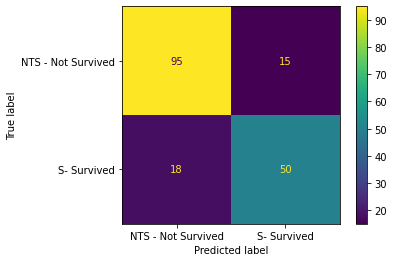

In [ ]:
labels =["NTS - Not Survived", "S- Survived"]
plot_confusion_matrix(model, X_test, Y_test, display_labels=labels)

In [ ]:
print(classification_report(Y_test, y_pred, target_names=labels))

                    precision    recall  f1-score   support

NTS - Not Survived       0.84      0.86      0.85       110
       S- Survived       0.77      0.74      0.75        68

          accuracy                           0.81       178
         macro avg       0.80      0.80      0.80       178
      weighted avg       0.81      0.81      0.81       178



# **Matriz de confusion**
accuracy = suma de presicciones correctas/predicciones totales

In [ ]:
pred_correctas = matcof[0][0] + matcof[1][1]
pred_totales = matcof[0][0] + matcof[0][1] + matcof[1][0] + matcof[1][1]
accuracy_matriz = pred_correctas / pred_totales
accuracy_matriz

0.8146067415730337

# **Precision**

Precision = positivos predichos correctamente / predicciones positivas

In [ ]:
precision = matcof[1][1] / (matcof[1][1] + matcof[0][1])
precision

0.7692307692307693

# **Recall**

Recall = True positive / (T positive + F Negative)

In [ ]:
recall = matcof[1][1] / (matcof[1][1] + matcof[1][0])
recall

0.7352941176470589

# **F1 score**

f1 score = 2 ((precision-recall) / (precision + recall))

In [ ]:
fsc1 = 2*((precision*recall) / (precision+recall))
fsc1

0.7518796992481205

# **SKLearn Metrics**


In [ ]:
print("Accuracy: {} : {}".format(accuracy_matriz, accuracy_score(Y_test,y_pred)))

Accuracy: 0.8146067415730337 : 0.8146067415730337


In [ ]:
print("Precision: {} : {}".format(precision, precision_score(Y_test,y_pred)))

Precision: 0.7692307692307693 : 0.7692307692307693


In [ ]:
print("Recall: {} : {}".format(recall, recall_score(Y_test,y_pred)))

Recall: 0.7352941176470589 : 0.7352941176470589


In [ ]:
print("F1_score: {} : {}".format(fsc1, f1_score(Y_test,y_pred)))

F1_score: 0.7518796992481205 : 0.7518796992481205


In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# **Cambiar el umbral (Thresold)**

In [ ]:
y_pred2=model.predict_proba(X_test)[:,1] >= 0.51
(y_pred2).sum()

64

In [ ]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178

